# **Esercitazione 1**
## **Task 4**

Obiettivo: controllare il segnale di ddp in uscita dalla aporta analogica W1 di AD2 con Ch1.

Set-up: Ch1 collegato a W1 che genera un segnale di ddp qualsiasi (DC, sinusoidale, ecc.) e Ch1- collegato alla terra. Di seguito lo script di controllo/acquisizione.

In [1]:
import tdwf
import numpy as np
import matplotlib.pyplot as plt
import time

plt.close('all')

Digilent WaveForms SDK versione 3.22.2


Digilent WaveForms SDK versione 3.24.4
Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1


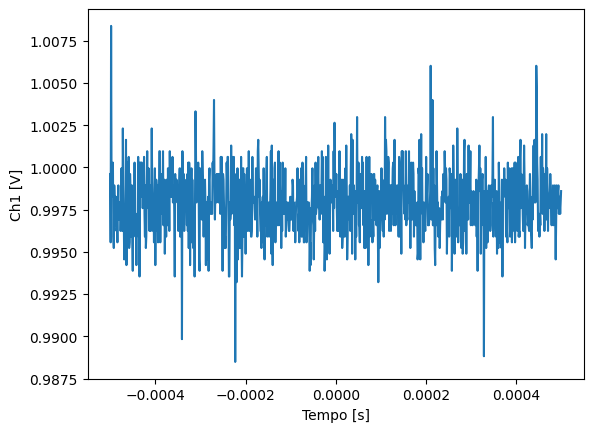

In [ ]:
ad2 = tdwf.AD2()
scope = tdwf.Scope(ad2.hdwf)
scope.fs = 1e6
scope.npt = 1000
scope.ch1.range = 5.0

wgen = tdwf.WaveGen(ad2.hdwf)   #inizializzazione del generatore
wgen.w1.config(offs=1, func=tdwf.funcDC)    #genero segnale DC a 1V
wgen.w1.start() #avvio del generatore

#scope.ch1.avg = True

scope.sample()

#time.sleep(0.5)     #tempo di attesa per evitare di acquisire transienti dello strumento

#print(scope.ch1.vals)

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()



sopra acquisizione di segnale DC da W1, si vede rumore sovrapposto a segnale DC di ampiezza circa 4mV, quindi $\frac{S}{N}$ $\simeq$ $10^3$

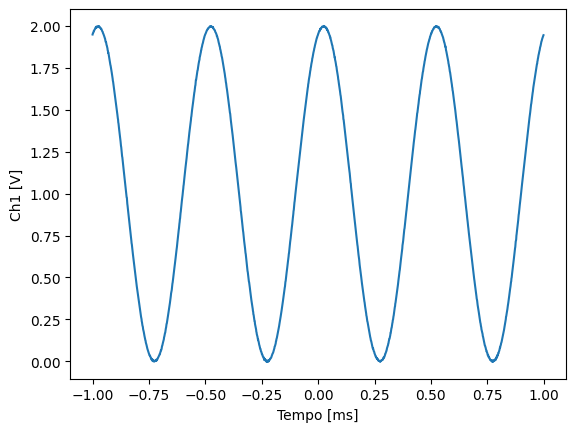

In [2]:
wgen.w1.config(offs=1, func=tdwf.funcSine, freq=2e3)    #genero segnale DC a 1V
wgen.w1.start() #avvio del generatore

scope.npt = 2000
scope.sample()

plt.plot(scope.time.vals*1e3, scope.ch1.vals, '-')
plt.xlabel("Tempo [ms]")
plt.ylabel("Ch1 [V]")

plt.show()


sopra acquisizione di una sinusoidale a 2kHz, ampiezza picco-picco settata di default a 2V e aggiunto offset di 1V (stesso del segnale DC sopra)

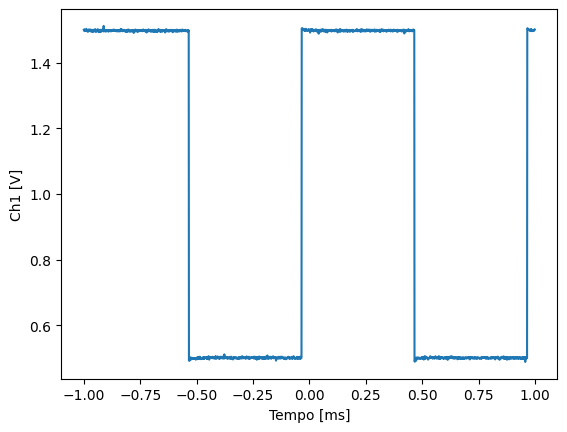

In [3]:
wgen.w1.config(offs=1, func=tdwf.funcSquare, freq=1e3, ampl=.5)    #genero segnale DC a 1V
wgen.w1.start() #avvio del generatore

scope.npt = 2000
scope.sample()

plt.plot(scope.time.vals*1e3, scope.ch1.vals, '-')
plt.xlabel("Tempo [ms]")
plt.ylabel("Ch1 [V]")

plt.show()

Acquisizione di onda quadra con frequenza pari alla metà della sinusoide dell'acquisione sopra ed ampiezza dimezzata, stesso offset. Noteare il rumore sovrapposto ai tratti orizzantali ed anche il breve transiente (di "carica/scarica") vicino ai punti di cambio di livello della ddp

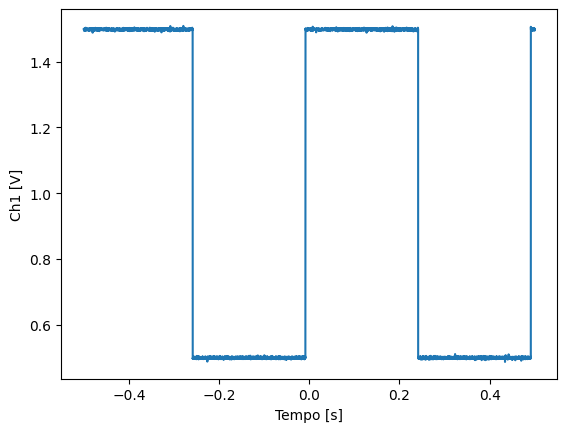

In [4]:
wgen.w1.config(offs=1, func=tdwf.funcSquare, freq=2, ampl=.5)    #genero segnale DC a 1V
wgen.w1.start() #avvio del generatore

scope.fs = 1e4
scope.npt = 10000
scope.sample()

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()

Nell'acquisizione sopra si è diminuita la frequenza di acquisizione ed aumentato il numero di punti in modo da avere un secondo di tempo di acquisizione. Questo è stato fatto al fine di avere livelli alti e bassi della quadra più lunghi (temporalmente parlando) così da non vedere più il transiente di W1 ed avere una forma d'onda "più bella"

## **Task 5 - Partitore di tensione parte 1**

Obiettivo: costruendo un partitore di tensione, misurare la ddp in ingresso $V_{in}$ ed in uscita $V_{out}$ con AD2 e generare le distribuzioni delle misure, dopo di che vericare la dipendenza dal range di acquisizione della distribuzione della ddp in ingresso misurate

Set up: Si sono scelte le due resistenze del partitore, $R_1$ ed $R_2$, in modo che, come richiesto $\frac{V_{out}}{V_{in}} < 1$, si sono quindi prese le seguenti resistenze: $R_1 = 1.0 \pm 1\%$  k $\Omega$ e $R_2 = 3.3 \pm 1\%$ k $\Omega$, ottendo $\frac{V_{out}}{V_{in}} \simeq 0.77$.

Di seguito lo script matlab utilizzato per genererare tutte le varie distribuzioni.

clear all

close all

tbl = readtable("misura10.txt",NumHeaderLines=1);

tbl.Properties.VariableNames = ["timestamp" "Ch1" "Ch2"]

plot(tbl.Ch1,'.')

%histogram(tbl.Ch1);

%xlabel("Ch1 [V]");

%ylabel("Counts");

% Prendiamo la minima distanza fra i valori unici della sequenza (ordinati)

dx = min(diff(unique(tbl.Ch1)))

% Bordi dei bins

bines = (min(tbl.Ch1)-dx/2):dx:(max(tbl.Ch1)+dx/2);

bins  = min(tbl.Ch1):dx:max(tbl.Ch1);

histogram(tbl.Ch1,BinEdges = bines);

xlabel("Ch1 [V]");

ylabel("Counts");

title('Istogramma misura a 2V con range a 5V')

hold off

dx = min(diff(unique(tbl.Ch2)))

bines = (min(tbl.Ch2)-dx/2):dx:(max(tbl.Ch2)+dx/2);

bins  = min(tbl.Ch2):dx:max(tbl.Ch2);

histogram(tbl.Ch2,BinEdges = bines);

xlabel("Ch1 [V]");

ylabel("Counts");

title('Istogramma misura a 2V in output')

tbl = readtable("misura50.txt",NumHeaderLines=1);

tbl.Properties.VariableNames = ["timestamp" "Ch1" "Ch2"]

%plot(tbl.Ch1,'.')

hold off

dx = min(diff(unique(tbl.Ch1)))

bines = (min(tbl.Ch1)-dx/2):dx:(max(tbl.Ch1)+dx/2);

bins  = min(tbl.Ch1):dx:max(tbl.Ch1);

histogram(tbl.Ch1,BinEdges = bines);

xlabel("Ch1 [V]");

ylabel("Counts");

title('Istogramma misura a 2V con range a 50V')



Di seguito la distribuzione della misura fatta a 2.2V in DC, all'ingresso del partitore con range di acquisizione pare a 5V

<img src='misura10_ch1_dist.png' Width=500>

la seguente, invece, è la misura all'output con la stessa ddp in ingresso

<img src='misura10_ch2_dist.png' Width=500>

Infine la distribuzione della ddp in ingresso a 2V, ma con range di acquisizione a 50V

<img src='misura50_ch1_dist.png' Width=500>

In generale si può notare come la distribuzione del canale 1 di AD2 tenda ad essere più larga di quella del canale 2, almeno per questo voltaggio. In più, per quanto riguarda l'acquisizione con un range di 50V, si può notare come i bin dell'istogramma siano più larghi a causa dell'aumento della risoluzione strumentale, atteso del resto dall'aumento del range di acquisizione.

## **Task 6 - Partitore di tensione parte 2**

Obiettivo: bisogna ottenere una misura del rapporto tra resistenza vista in output da Ch2 e resistenza equivalente del partitore:

\begin{equation}
    \frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}
\end{equation}

la strada scelta è  quella di misurare con AD2 diversi valori di ddp in continua inseriti nel partitore con W1, sia in ingresso che in uscita, e poi calcolarne media e deviazione standard, per poi fittare i valori ottenuti con un modello lineare per ottenere il coefficiente angolare pari al rapporto cercato.
Il modello è il seguente:

\begin{equation}
    V_{out} = V_{in} \frac{R_2}{R_1 + R_2}
\end{equation}

Set_up: 

I dati sono stati acquisiti con il seguente script python (si osservi come il numero di misure possa essere scelto a piacere, ovviamente più misure si fanno più l'accurattezza del risulato del fit sarà migliore):

In [1]:
import tdwf
import numpy as np
import matplotlib.pyplot as plt
import time

plt.close('all')
path='/home/marco/Desktop/Uni_anno3/TD/Es_01/misure'  #percorso in cui salvare i dati

ad2 = tdwf.AD2()    #connessione all'hardware

'''Configurazione dell'oscilloscopio'''
scope = tdwf.Scope(ad2.hdwf)
scope.fs = 1e6
scope.npt = 8192
scope.ch1.rng = 5.0
scope.ch2.rng = 5.0
#scope.trig(True, level=2, sour = tdwf.trigsrcCh1)
scope.ch1.avg = False
scope.ch2.avg = False

V = np.linspace(-2.0, 2.0, 10)  #Vettore dei valori di tensione da impostare

for i in range(10):

    '''Configurazione di W1'''
    wgen = tdwf.WaveGen(ad2.hdwf)   #inizializzazione del generatore
    wgen.w1.config(offs=V[i], func=tdwf.funcDC)    #impostazione dell'offset del segnale e del tipo di funzione in output
    wgen.w1.start() #avvio del generatore

    time.sleep(0.5)
    scope.sample()

    '''Acquisizione dati'''
    #data = np.column_stack((scope.time.vals, scope.ch1.vals, scope.ch2.vals))
    #np.savetxt(path+'/misura'+str(i+1)+'.txt', data, delimiter='\t', header='Time [s], Ch1 [V], Ch2 [V]')

    '''Plot acquisizioni'''
    '''
    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(scope.time.vals, scope.ch1.vals,'.', label='Ch1')
    plt.plot(scope.time.vals, scope.ch2.vals, '.', label='Ch2')
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ch1 [V]")
    plt.legend()
    #plt.title('Misura con offset = '+str(V[i])+' V')
    '''
plt.show()

Digilent WaveForms SDK versione 3.24.4
Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1


I dati così acquisiti sono stati analizzati con il seguente script matlab